## misclassified mnist

In [2]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 为了导入父目录而进行的设定
import numpy as np
import matplotlib.pyplot as plt
from ch08.deep_convnet import DeepConvNet
from dataset.mnist import load_mnist


(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

network = DeepConvNet()
network.load_params("ch08/deep_convnet_params.pkl")

print("calculating test accuracy ... ")
#sampled = 1000
#x_test = x_test[:sampled]
#t_test = t_test[:sampled]


calculating test accuracy ... 


In [3]:

classified_ids = []

acc = 0.0
batch_size = 100

for i in range(int(x_test.shape[0] / batch_size)):
    tx = x_test[i*batch_size:(i+1)*batch_size]
    tt = t_test[i*batch_size:(i+1)*batch_size]
    y = network.predict(tx, train_flg=False)
    y = np.argmax(y, axis=1)
    classified_ids.append(y)
    acc += np.sum(y == tt)
    
acc = acc / x_test.shape[0]
print("test accuracy:" + str(acc))


test accuracy:0.9935


======= misclassified result =======
{view index: (label, inference), ...}
{1: (6, 0), 2: (3, 5), 3: (3, 5), 4: (8, 3), 5: (7, 3), 6: (1, 3), 7: (8, 9), 8: (6, 0), 9: (6, 5), 10: (7, 2), 11: (9, 4), 12: (7, 1), 13: (5, 3), 14: (1, 3), 15: (0, 6), 16: (9, 4), 17: (7, 9), 18: (6, 0), 19: (9, 8), 20: (4, 9)}


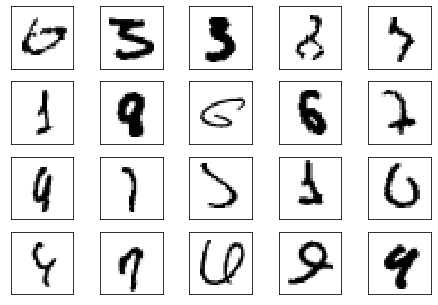

In [4]:

classified_ids = np.array(classified_ids)
classified_ids = classified_ids.flatten()
 
max_view = 20
current_view = 1

fig = plt.figure()
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.2, wspace=0.2)

mis_pairs = {}
for i, val in enumerate(classified_ids == t_test):
    if not val:
        ax = fig.add_subplot(4, 5, current_view, xticks=[], yticks=[])
        ax.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.gray_r, interpolation='nearest')
        mis_pairs[current_view] = (t_test[i], classified_ids[i])
            
        current_view += 1
        if current_view > max_view:
            break

print("======= misclassified result =======")
print("{view index: (label, inference), ...}")
print(mis_pairs)

plt.show()


## half float network

In [1]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 为了导入父目录而进行的设定
import numpy as np
import matplotlib.pyplot as plt
from ch08.deep_convnet import DeepConvNet
from dataset.mnist import load_mnist


(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

network = DeepConvNet()
network.load_params("ch08/deep_convnet_params.pkl")

sampled = 10000 # 为了实现高速化
x_test = x_test[:sampled]
t_test = t_test[:sampled]

print("caluculate accuracy (float64) ... ")
print(network.accuracy(x_test, t_test))

# 转换为float16型
x_test = x_test.astype(np.float16)
for param in network.params.values():
    param[...] = param.astype(np.float16)

print("caluculate accuracy (float16) ... ")
print(network.accuracy(x_test, t_test))


caluculate accuracy (float64) ... 
0.9935
caluculate accuracy (float16) ... 
0.9935


## 测试一下我们自己的手写数字

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ch08.deep_convnet import DeepConvNet

network = DeepConvNet()
network.load_params("ch08/deep_convnet_params.pkl")

### 单个数字

In [21]:
# 尝试识别一串数字，用滑动窗口的方法
import imageio # for reading images
import glob # for reading files
import numpy as np # for arrays
import matplotlib.pyplot as plt # for plotting
from common.functions import softmax # for softmax
%matplotlib inline

class ImagePredict:
    def __init__(self):
        self.imageArray = None

    def imageioRead2plt(self, imageFile):
        # @imageFile: the image file path
        # @return: the image data in a 1D array
        self.imageArray = imageio.imread(imageFile, as_gray=True)
        # 0 is white and 1 is black in the matplotlib image so we invert the array above
        img_data = 255.0 - self.imageArray.reshape(self.imageArray.size)

        # normalize the image data to be between 0.01 and 1.0
        img_data = (img_data / 255.0 * 0.99) + 0.01 
        return img_data

    def pltshow(self, img_data):
        # show the image 255 is white and 0 is black we turn it into a 28x28 array
        plt.imshow(np.asfarray(img_data).reshape((self.imageArray.shape)), cmap='Greys', interpolation='None')

    def predict(self, img_data, network):
        # 识别图片中的数字
        x = img_data
        y = network.predict(x.reshape(1,1,28,28))
        t = softmax(y)
        p_index = np.argmax(y) # 获取概率最高的元素的索引
        # print("神经网络预测结果为:", p_index)
        return p_index, t[0][p_index]
    
    def ReadShowPredict(self, imageFile, network):
        img_data = self.imageioRead2plt(imageFile)
        self.pltshow(img_data)
        p_index, p = self.predict(img_data, network)
        print("神经网络预测结果为:", p_index, "概率为:", p)
        return p_index, p

IP = ImagePredict()

In [20]:
## 识别单个数字测试
myImageNameList = []
for imageFile in glob.glob('myImages/*.png'):
    myImageNameList.append(imageFile)
    pass

神经网络预测结果为: 9 概率为: 0.47303550602404804
神经网络预测结果为: 1 概率为: 0.35264527705147575
神经网络预测结果为: 2 概率为: 0.9956988362607224
神经网络预测结果为: 3 概率为: 0.9942521160803786
神经网络预测结果为: 4 概率为: 0.7942640900134723
神经网络预测结果为: 5 概率为: 0.9589095314655524
神经网络预测结果为: 6 概率为: 0.8360918867117583
神经网络预测结果为: 7 概率为: 0.32463224545641167
神经网络预测结果为: 8 概率为: 0.9649918939860697
神经网络预测结果为: 9 概率为: 0.7804137783218721


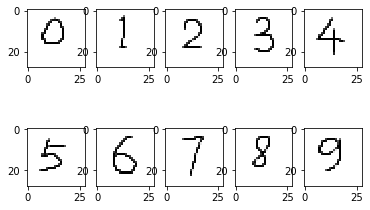

In [22]:

i = 1
w = 2
h = int( len(myImageNameList) / w)
for oneImage in myImageNameList:
    plt.subplot(w, h, i)
    IP.ReadShowPredict(oneImage, network)
    i = i + 1


> 惊人的结果，除了第一个数字，其他的都被正确识别了。

### 多个数字

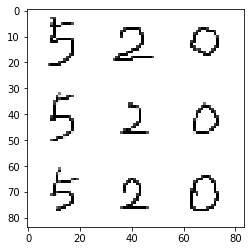

In [23]:
# 读入一张图片的数据 里面包含了一行数字
imageFile = 'numbers3.png'
img_data = IP.imageioRead2plt(imageFile)
IP.pltshow(img_data)

In [40]:
img_data.shape

(7056,)

In [41]:
type(img_data)

imageio.core.util.Array

In [24]:
original_img_data = img_data.copy()
original_img_data = original_img_data.reshape(IP.imageArray.shape)
# 用滑动窗口的方法识别数字
# 从左到右 从上到下

# 识别数字的宽度
w = 28
# 识别数字的高度
h = 28
# 识别数字的间隔
g = 0
# 识别数字的总数
n = 3

# 识别数字的起始位置
x = 0
y = 0

# 识别数字的结束位置
xend = w * n + g * (n - 1)
yend = h * n + g * (n - 1)

# 识别数字的结果
result = []

识别的数字为: [(5, 0.7570650895029465), (2, 0.998375592106089), (9, 0.5740317965717111), (5, 0.9481438544243985), (2, 0.9726623081171946), (0, 0.24830246392836258), (5, 0.7191261294516303), (2, 0.6712600011349168), (0, 0.38031674792268394)]


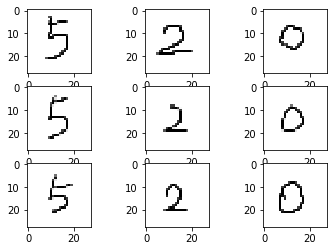

In [25]:
while y < yend:
    while x < xend:
        # 识别数字的区域
        ROI_img_data = original_img_data[y:y+h, x:x+w]
        tmp_img_data = ROI_img_data.reshape(1, 784)
        plt.subplot(3,3, len(result) + 1)
        plt.imshow(np.asfarray(tmp_img_data).reshape(w,h), cmap='Greys', interpolation='None')
        result.append(IP.predict(tmp_img_data, network))
        x = x + w + g
        pass
    y = y + h + g
    x = 0
    pass

print("识别的数字为:", result)

> 直接识别对了九个数字，这个结果真的很惊人。

## 识别给定图片（图片大小未确定的）中特定位置的数字

In [2]:
import cv2 as cv
import numpy as np

In [3]:

# 返回左上角和右下角的顶点坐标
def get_ROI(approx):
    a = approx.reshape(4, 2)
    minx = np.min(a[:, 0])
    miny = np.min(a[:, 1])
    maxx = np.max(a[:, 0])
    maxy = np.max(a[:, 1])
    return minx, miny, maxx, maxy

In [4]:
%%HTML
<img src="image/Figure_1.png" width="300"/>
<img src="image/Figure_2.png" width="300"/>
<img src="image/Figure_3.png" width="300"/>
<img src="image/Figure_4.png" width="300"/>
<img src="image/Figure_5.png" width="300"/>
<img src="image/Figure_6.png" width="300"/>

### 处理图形和数字

In [29]:
# 尝试识别一串数字，用滑动窗口的方法
import imageio # for reading images
import glob # for reading files
import numpy as np # for arrays
import matplotlib.pyplot as plt # for plotting
from common.functions import softmax # for softmax
%matplotlib inline

class ImagePredict:
    def __init__(self):
        self.imageArray = None

    def imageioRead2plt(self, imageFile):
        # @imageFile: the image file path
        # @return: the image data in a 1D array
        self.imageArray = imageio.imread(imageFile, as_gray=True)
        # 0 is white and 1 is black in the matplotlib image so we invert the array above
        img_data = 255.0 - self.imageArray.reshape(self.imageArray.size)

        # normalize the image data to be between 0.01 and 1.0
        img_data = (img_data / 255.0 * 0.99) + 0.01 
        return img_data

    def convertpng2plt(self, image_data):
        # @image_data: the image data in a 1D array
        # @return: the image data in a 1D array
        # 0 is white and 1 is black in the matplotlib image so we invert the array above
        self.imageArray = image_data
        img_data = 255.0 - image_data.reshape(image_data.size)

        # normalize the image data to be between 0.01 and 1.0
        img_data = (img_data / 255.0 * 0.99) + 0.01 
        return img_data

    def pltshow(self, img_data):
        # show the image 255 is white and 0 is black we turn it into a 28x28 array
        plt.imshow(np.asfarray(img_data).reshape((self.imageArray.shape)), cmap='Greys', interpolation='None')

    def predict(self, img_data, network):
        # 识别图片中的数字
        x = img_data
        y = network.predict(x.reshape(1,1,28,28))
        t = softmax(y)
        p_index = np.argmax(y) # 获取概率最高的元素的索引
        # print("神经网络预测结果为:", p_index)
        return p_index, t[0][p_index]
    
    def ReadShowPredict(self, imageFile, network):
        img_data = self.imageioRead2plt(imageFile)
        self.pltshow(img_data)
        p_index, p = self.predict(img_data, network)
        print("神经网络预测结果为:", p_index, "概率为:", p)
        return p_index, p

IP = ImagePredict()

In [8]:
## 在每个ROI中找出三角形，圆形和矩形和数字
def findAndCount_shape_num(contours, shape_num, img_test_draw_shape, minx, miny):
    # @param contours: ROI区域中的轮廓
    # @param shape_num: 三角形，圆形和矩形的个数 是一个字典
    # @param img_test_draw_shape: 画出三角形，圆形和矩形的图像
    # @param minx: ROI区域的左上角的x坐标
    # @param miny: ROI区域的左上角的y坐标
    # 图像轮廓的中心点
    min_area = 100000
    min_contour = None
    max_area = 0
    max_contour = None
    for contour in contours:
        area = cv.contourArea(contour)
        if area < min_area:
            min_area = area
            min_contour = contour
        if area > max_area:
            max_area = area
            max_contour = contour
    M = cv.moments(min_contour)
    num_cx = minx + int(M['m10'] / M['m00'])
    num_cy = miny + int(M['m01'] / M['m00'])
    cv.rectangle(img_test_draw_shape, (num_cx - 14, num_cy - 14), (num_cx + 14, num_cy + 14), (0, 255, 0), 2)
    for contour in contours:
        area = cv.contourArea(contour)
        if area == max_area or area == min_area:
            continue
        M = cv.moments(contour)
        shape_cx = minx + int(M['m10'] / M['m00'])
        shape_cy = miny + int(M['m01'] / M['m00'])
        if abs(shape_cx - num_cx) < 10 and abs(shape_cy - num_cy) < 10:
            continue
        # # 画出轮廓中心点 画一个+号
        # cv.line(img_test_draw_shape, (shape_cx - 5, shape_cy), (shape_cx + 5, shape_cy), (255, 0, 255), 2)
        # cv.line(img_test_draw_shape, (shape_cx, shape_cy - 5), (shape_cx, shape_cy + 5), (255, 0, 255), 2)
        perimeter = cv.arcLength(contour, True)
        epsilon = 0.01 * perimeter
        approx = cv.approxPolyDP(contour, epsilon, True)
        # 变换到原图像的坐标
        approx[:, 0, 0] += minx
        approx[:, 0, 1] += miny
        if ((len(approx) > 3) and (len(approx) < 10))and (area > 50 and area < 500):
            cv.drawContours(img_test_draw_shape, [approx], 0, (255, 255, 255), 2)
            shape_num['rectangle'] = shape_num.get('rectangle', 0) + 1
        elif (len(approx) <= 4) and (area > 200 and area < 500):
            cv.drawContours(img_test_draw_shape, [approx], 0, (0, 0, 0), 2)
            shape_num['triangle'] = shape_num.get('triangle', 0) + 1
        elif len(approx) >= 10 and (area > 200 and area < 400):
            cv.drawContours(img_test_draw_shape, [approx], 0, (255, 0, 255), 2)
            shape_num['circle'] = shape_num.get('circle', 0) + 1
    return num_cx - 14, num_cy - 14, num_cx + 14, num_cy + 14
        

In [30]:
from ch08.deep_convnet import DeepConvNet

## 加载网络
network = DeepConvNet()
network.load_params("ch08/deep_convnet_params.pkl")

In [81]:
img_test = cv.imread('image/Figure_7.png')

In [82]:
img_test_gray = cv.cvtColor(img_test, cv.COLOR_BGR2GRAY)
ret, img_test_binary = cv.threshold(img_test_gray, 127, 255, cv.THRESH_BINARY)
img_test_adaptive_thresh_mean = cv.adaptiveThreshold(img_test_gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)
# 获得感兴趣区域的九个区域
ret, img_test_adaptive_thresh_mean_binary = cv.threshold(img_test_adaptive_thresh_mean, 127, 255, cv.THRESH_BINARY)
contours, hierarchy = cv.findContours(img_test_adaptive_thresh_mean_binary, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE) 
# contours是一个list，每个元素都是一个轮廓
# hierarchy是一个ndarray，每一行是一个轮廓的信息，包括下一个轮廓的索引，上一个轮廓的索引，第一个子轮廓的索引，父轮廓的索引
ROI_list = []
for i in range(len(contours)):
    cnt = contours[i]
    area = cv.contourArea(cnt)
    if area > 10000 and area < 100000:
        # 计算轮廓的周长
        perimeter = cv.arcLength(cnt, True)
        # 轮廓近似
        epsilon = 0.01 * perimeter
        approx = cv.approxPolyDP(cnt, epsilon, True) # approx是一个ndarray，每一行是一个顶点的坐标
        ROI_list.append(approx)

In [83]:
# 画出三角形，圆形和矩形
img_test_draw_shape = img_test.copy()
shape_num = {}
for i in range(len(ROI_list)):
    ROI_area = ROI_list[i]
    minx, miny, maxx, maxy = get_ROI(ROI_area)
    ROI_gray = img_test_adaptive_thresh_mean[miny:maxy, minx:maxx].copy()
    ret, ROI_binary = cv.threshold(ROI_gray, 127, 255, cv.THRESH_BINARY)
    contours, hierarchy = cv.findContours(ROI_binary, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    num_x1, num_y1, num_x2, num_y2 = findAndCount_shape_num(contours, shape_num, img_test_draw_shape, minx, miny)
    num_roi = img_test_adaptive_thresh_mean[num_y1:num_y2, num_x1:num_x2].copy()
    tmproi = IP.convertpng2plt(num_roi)
    num_predict , num_Possibility = IP.predict(tmproi, network)
    cv.putText(img_test_draw_shape, str(num_predict), (num_x1, num_y1), cv.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 2)
    
# 打印每个ROI中的三角形，圆形和矩形的个数
for key, value in shape_num.items():
    print(key, value)
cv.imshow('img_test_draw_shape', img_test_draw_shape)
cv.waitKey(0)


circle 2
rectangle 4
triangle 2


-1

In [84]:
cv.imwrite('img_test_draw_shape_7.jpg', img_test_draw_shape)

True

In [85]:
%%HTML
<img src="img_test_draw_shape.jpg" width="400">
<img src="img_test_draw_shape_1.jpg" width="400">
<img src="img_test_draw_shape_2.jpg" width="400">
<img src="img_test_draw_shape_3.jpg" width="400">
<img src="img_test_draw_shape_4.jpg" width="400">
<img src="img_test_draw_shape_5.jpg" width="400">
<img src="img_test_draw_shape_6.jpg" width="400">
<img src="img_test_draw_shape_7.jpg" width="400">

--------------------------------------------------

下面是一些demo，均已经在上面实现。

### 识别数字

In [15]:
num_roi = cv.imread('image/num_roi_0.jpg', 0)
cv.imshow('num_roi', num_roi)
cv.waitKey(0)

-1

In [17]:
%%HTML
<img src="image/num_roi_0.jpg" width="20" height="20" />
<img src="image/num_roi_1.jpg" width="20" height="20" />
<img src="image/num_roi_2.jpg" width="20" height="20" />
<img src="image/num_roi_3.jpg" width="20" height="20" />
<img src="image/num_roi_4.jpg" width="20" height="20" />
<img src="image/num_roi_5.jpg" width="20" height="20" />
<img src="image/num_roi_6.jpg" width="20" height="20" />
<img src="image/num_roi_7.jpg" width="20" height="20" />
<img src="image/num_roi_8.jpg" width="20" height="20" />

In [18]:
num_roi.shape

(28, 28)

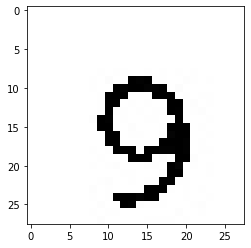

In [26]:
tmp_img_data = IP.convertpng2plt(num_roi)
IP.pltshow(tmp_img_data)

In [27]:
## 加载网络识别数字
import numpy as np
import matplotlib.pyplot as plt
from ch08.deep_convnet import DeepConvNet

network = DeepConvNet()
network.load_params("ch08/deep_convnet_params.pkl")

In [28]:
IP.predict(tmp_img_data, network)

(9, 0.5101174592679055)

### 处理数字

In [39]:
## 我们首先要在上图找到数字的位置，然后再对数字进行识别
## 1. 找到数字的位置
num_pos_list = []
for i in range(9):
    img_roi_test = cv.imread('image/ROI/ROI_img_' + str(i) + '.png')
    img_roi_test_gray = cv.cvtColor(img_roi_test, cv.COLOR_BGR2GRAY)
    ret, img_roi_test_binary = cv.threshold(img_roi_test_gray, 127, 255, cv.THRESH_BINARY)
    contours, hierarchy = cv.findContours(img_roi_test_binary, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE) 
    # contours是一个list，每个元素是一个ndarray，每一行是一个顶点的坐标
    # hierarchy是一个ndarray，每一行是一个轮廓的信息，[next, previous, first_child, parent]
    img_roi_test_draw = img_roi_test.copy()
    # 获得轮廓中最小的轮廓
    min_area = 100000
    min_contour = None
    for contour in contours:
        area = cv.contourArea(contour)
        if area < min_area:
            min_area = area
            min_contour = contour
    # # 周长
    # perimeter = cv.arcLength(min_contour, True)
    # # 轮廓近似
    # epsilon = 0.01 * perimeter
    # approx = cv.approxPolyDP(min_contour, epsilon, True)
    # cv.drawContours(img_roi_test_draw, [approx], 0, (0, 0, 255), 2)
    # 图像轮廓的中心点
    M = cv.moments(min_contour)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    # 画出轮廓中心点 画一个+号
    # cv.line(img_roi_test_draw, (cx - 5, cy), (cx + 5, cy), (255, 0, 0), 2)
    # cv.line(img_roi_test_draw, (cx, cy - 5), (cx, cy + 5), (255, 0, 0), 2)
    # 在轮廓中心点画一个正方形 用来切割数字
    # roi_num_pos = (cx - 14, cy - 14, cx + 14, cy + 14)
    # num_pos_list.append(roi_num_pos)
    cv.rectangle(img_roi_test_draw, (cx - 14, cy - 14), (cx + 14, cy + 14), (0, 255, 0), 2)
    cv.imshow('img_roi_test_draw', img_roi_test_draw)
    cv.waitKey(0)
    cv.destroyAllWindows()